In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [96]:
fwhm_ml = []
pssn_ml = []

fwhm_exp = []
pssn_exp = []

for i in range(5):
    p, f = np.loadtxt(
        f"/astro/store/epyc/users/jfc20/aos/closedLoop_outputs/aoclc_output/iter{i}/img/PSSN.txt"
    )
    fwhm_ml.append(f[-1])
    pssn_ml.append(p[-1])

    p, f = np.loadtxt(
        f"/phys/users/jfc20/lsst/closedLoop_outputs/exp_closedLoop_output3/iter{i}/img/PSSN.txt"
    )
    fwhm_exp.append(f[-1])
    pssn_exp.append(p[-1])


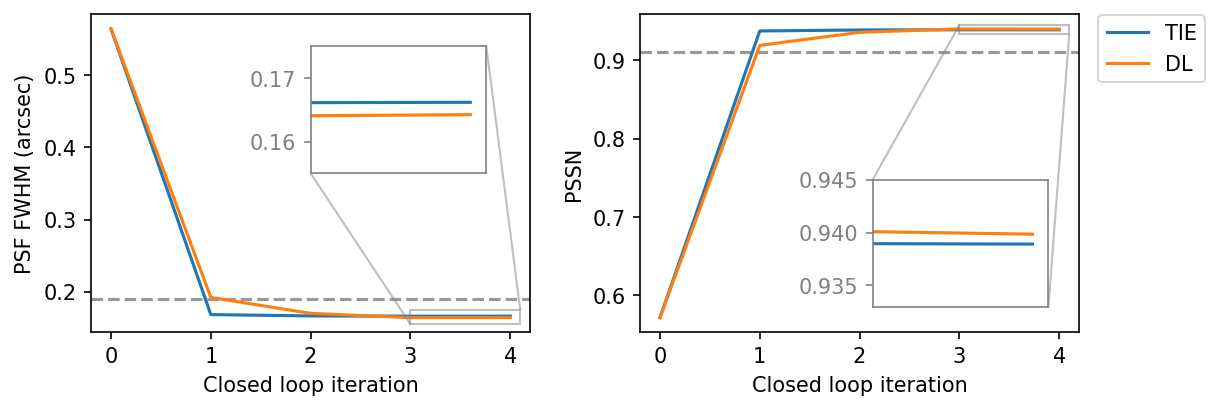

In [132]:
fig, axes = plt.subplots(
    1,
    2,
    figsize=(8.5, 2.75),
    dpi=150,
    constrained_layout=False,
)

# Plot FWHM on the left
axes[0].plot(fwhm_exp)
axes[0].plot(fwhm_ml)
axes[0].axhline(
    0.19,
    c="gray",
    ls="--",
    alpha=0.8,
    zorder=0,
)
axes[0].set(xlabel="Closed loop iteration", ylabel="PSF FWHM (arcsec)")

# Add the inset on the left
axin_left = axes[0].inset_axes([0.5, 0.5, 0.4, 0.4], xticks=[], xlim=(3, 4.1), ylim=(0.155, 0.175))
axin_left.plot(fwhm_exp)
axin_left.plot(fwhm_ml)
axin_left.tick_params(colors='gray')
axin_left.spines[:].set_color("gray")
axes[0].indicate_inset_zoom(axin_left, edgecolor="gray")

# Plot PSSN on the right
axes[1].plot(pssn_exp, label="TIE")
axes[1].plot(pssn_ml, label="DL")
axes[1].axhline(
    0.91,
    c="gray",
    ls="--",
    alpha=0.8,
    zorder=0,
)
axes[1].set(xlabel="Closed loop iteration", ylabel="PSSN")

# Add the inset on the right
axin_right = axes[1].inset_axes([0.53, 0.08, 0.4, 0.4], xticks=[], xlim=(3, 4.1), ylim=(0.933, 0.945))
axin_right.plot(pssn_exp)
axin_right.plot(pssn_ml)
axin_right.tick_params(colors='gray')
axin_right.spines[:].set_color("gray")
axes[1].indicate_inset_zoom(axin_right, edgecolor="gray")

axes[1].legend(bbox_to_anchor=(1.02, 1.03), loc="upper left")

plt.subplots_adjust(wspace=0.25)


fig.savefig("figures/closed_loop.pdf", bbox_inches="tight")
